In [2]:
# Name: Jiajin Liang
# Email: jil904@ucsd.edu

# Question 1
import numpy as np
import matplotlib.pyplot as pyp
import math
dataset = np.load("assignment22.npy")
#print(dataset)
# Linear Regression
m = 1
N = np.shape(dataset)[0]
b = np.ones((N,1))
alpha = 0.08
p = 1e-5
x = [[0]]
y = [[0]]
for xy in dataset:
    x = np.append(x,[[xy[0]]],0)
    y = np.append(y,[[xy[1]]],0)
x = x[1:31,:]
y = y[1:31,:]
ones = np.ones((N,1))
keepgoing = True
while keepgoing:
    dMdm = 2/N * (-x.T.dot(y) + m*x.T.dot(x) + x.T.dot(b))
    dMdb = 2/N * (-ones.T.dot(y) + m*ones.T.dot(x) + ones.T.dot(b))
    m = m - alpha * dMdm
    b = b - alpha * dMdb
    #m = tempm
    #b = tempb
    dMdm = 2/N * (-x.T.dot(y) + m*x.T.dot(x) + x.T.dot(b))
    dMdb = 2/N * (-ones.T.dot(y) + m*ones.T.dot(x) + ones.T.dot(b))
    MSE = math.sqrt(dMdm**2 + dMdb**2)
    if MSE<p:
        keepgoing = False
    #print(dMdm)
print(np.shape(x),np.shape(m*x+b))
print(m,b[0])
pyp.scatter(x, y, s=10, c='red')
pyp.plot(x, m*x+b)
pyp.show()

(30, 1) (30, 1)
[[2.81764176]] [14.21594067]


2.5197383556448774 0.8905139384329775 6.458491919110976


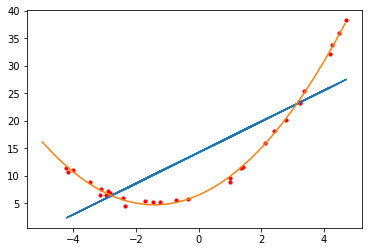

In [3]:
# Quadratic Regression
alpha = 0.001
p = 1e-5
M1 = 1
M2 = 1
B = 1
Xto2 = x**2
keepgoing = True
while keepgoing:
    #dMdM1 = 2/N * (-x.T.dot(y) + M1*x.T.dot(x) + M2*x.T.dot(Xto2) + x.T.dot(b))
    #dMdM2 = 2/N * (-Xto2.T.dot(y) + M1*Xto2.T.dot(x) + M2*Xto2.T.dot(Xto2) + Xto2.T.dot(b))
    #dMdB = 2/N * (-ones.T.dot(y) + M1*ones.T.dot(x) + M2*ones.T.dot(Xto2) + ones.T.dot(b))
    dMdM1 = 2/N * sum([-xy[0]*xy[1] + M1*xy[0]**2 + M2*xy[0]**3 + xy[0]*B for xy in dataset])
    dMdM2 = 2/N * sum([-xy[0]**2*xy[1] + M1*xy[0]**3 + M2*xy[0]**4 + xy[0]**2*B for xy in dataset])
    dMdB = 2/N * sum([-1*xy[1] + M1*xy[0] + M2*xy[0]**2 + B for xy in dataset])
    M1 = M1 - alpha * dMdM1
    M2 = M2 - alpha * dMdM2
    B = B - alpha * dMdB

    dMdM1 = 2/N * sum([-xy[0]*xy[1] + M1*xy[0]**2 + M2*xy[0]**3 + xy[0]*B for xy in dataset])
    dMdM2 = 2/N * sum([-xy[0]**2*xy[1] + M1*xy[0]**3 + M2*xy[0]**4 + xy[0]**2*B for xy in dataset])
    dMdB = 2/N * sum([-1*xy[1] + M1*xy[0] + M2*xy[0]**2 + B for xy in dataset])
    #print(dMdM1,dMdM2,dMdB.shape)
    MSE = math.sqrt(dMdM1**2 + dMdM2**2 + dMdB**2)
    #print(MSE)
    if MSE<=p:
        keepgoing = False
print(M1,M2,B)
X = np.array(range(0,30))/3-5
#X = np.linspace(-5,5,100)
#print(X)

Y = M1*X + M2*X**2 + B
pyp.scatter(x, y, s=10, c='red')
pyp.plot(x,m*x+b)
pyp.plot(X,Y)
pyp.show()

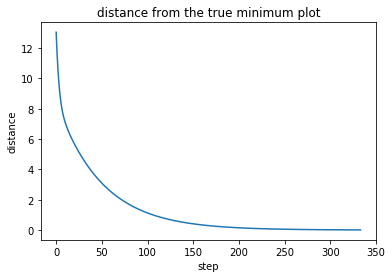

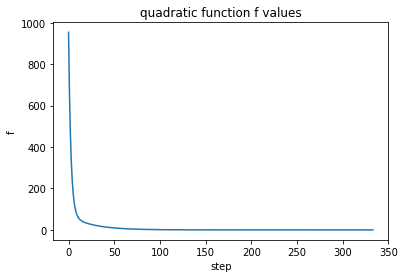

In [6]:
# Question 2
# Gradient Descent Algorithm
def der(z):
    x = z[0]
    y = z[1]
    r = np.zeros((2,))
    r[0] = 4*(-5 + 2*x + y) + 2*(-7 + x + 2*y)
    r[1] = 2*(-5 + 2*x + y) + 4*(-7 + x + 2*y)
    return r

def descent_step(t, x, grad):
    xk = x  - t * grad
    return xk

def func(z):
    x = z[0]
    y = z[1]
    r = (x+2*y-7)*(x+2*y-7)+ (2*x+y-5)*(2*x+y-5)
    return r
    
x = np.array([0, -10])
xstar = np.array([1,3])
alpha = 0.01
precision = 0.01
num_it_GD = 0
#steps = 1000
dists = []
fvals = [] 
traj_GD = [] 

#for k in range(steps):
while(np.linalg.norm(x-xstar)>precision):
    num_it_GD += 1
    grad = der( x )
    xk = descent_step(alpha, x, grad)

    dists.append( np.linalg.norm(x-xstar))
    fvals.append( func( x) )
    x = xk
    traj_GD.append(x)
xstar = x
#print(traj.shape)    
pyp.plot(dists)
pyp.title("distance from the true minimum plot")
pyp.xlabel("step")
pyp.ylabel("distance")
pyp.show()
pyp.plot(fvals)
pyp.title("quadratic function f values")
pyp.xlabel("step")
pyp.ylabel("f")
pyp.show()
    
#define the quadratic function#define  
#Q = np.array([[1, 0.5], [0.5, 2]])
#b = np.array([1, 1])
#xstar = -np.dot(np.linalg.inv(Q), b)

In [8]:
# Nearest Neighbor algorithm
def f(x,y):
    return ((x+2*y-7)**2+(2*x+y-5)**2)
def simple_traj(sx,sy):
    traj = [(sx,sy)]
    h = 0.01
    precision = 0.01
    count = 0
    while True:
        count += 1
        arr = [[sx,sy+h],[sx,sy-h],[sx+h,sy],[sx+h,sy+h],[sx+h,sy-h],
               [sx-h,sy],[sx-h,sy+h],[sx-h,sy-h]]
        farr = [f(xy[0],xy[1]) for xy in arr]
        smallest = np.min(farr)
        #print(sx,sy,f(sx,sy),smallest)
        if (f(sx,sy) - smallest < precision)or(f(sx,sy)-smallest<0):
            return sx,sy,traj,count
        sx = arr[np.argmin(farr)][0]
        sy = arr[np.argmin(farr)][1]
        traj.append((sx,sy))
x,y,traj_NN,num_it_NN = simple_traj(0,-10)

minima computed by Gradient Descent is  [1.00704142 2.99295858]
minima computed by Nearest Neighbor is  1.220000000000001 2.7199999999998172
number of iterations used by Gradient Descnet is  334
number of iterations used by Nearest Neighbors is  1273


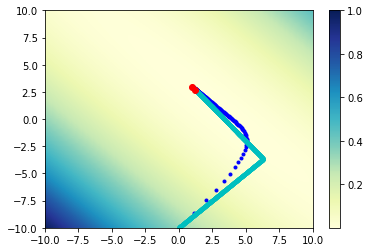

In [9]:
#plotting the gradient as heat map
#compute heatmap at each point for [gradx, grady]
#compute the heat map of the function
#nrpts = 50
#xs = np.linspace(-2, 2, num = nrpts)
#ys = np.linspace(-2, 2, num = nrpts)

#heatmap = np.zeros((50, 50), dtype = float)
#for i in range(50):
#    for j in range(50):
#        heatmap[i,j] = quadratic(Q, b, np.array([xs[i], ys[j]]))
#heatmap = heatmap / np.max(np.max(heatmap))

nrpts = 1000
xs = np.linspace(-10, 10, num = nrpts)
ys = np.linspace(-10, 10, num = nrpts)
xs = xs.reshape( (nrpts,1) )
ys = ys.reshape( (1, nrpts) )
h = 1. / nrpts

gradx = (((xs+h)+2*ys-7)**2+(2*(xs+h)+ys-5)**2-((xs+2*ys-7)**2+(2*xs+ys-5)**2))/h
grady = ((xs+2*(ys+h)-7)**2+(2*xs+(ys+h)-5)**2-((xs+2*ys-7)**2+(2*xs+ys-5)**2))/h
#print(gradx)
heatmap = gradx*gradx + grady*grady
heatmap = heatmap / np.max(np.max(heatmap))
#print("HeatMap")
#print(heatmap)
#'RdBu'
#print("Trajactory in Heatmap:")
#cmap = plt.get_cmap('YlGnBu')
#fig, ax = plt.subplots()
#xsf = np.meshgrid(xs, ys)[0]
#ysf = np.meshgrid(xs, ys)[1]
#im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
#fig.colorbar(im, ax=ax)
#plotting the trajactory
#for t in t1+t2+t3+t4:
#    plt.plot(t[0], t[1], 'r.')
#plt.show()

cmap = pyp.get_cmap('YlGnBu')
fig, ax = pyp.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)
print("minima computed by Gradient Descent is ", xstar)
print("minima computed by Nearest Neighbor is ", x,y)
print("number of iterations used by Gradient Descnet is ", num_it_GD)
print("number of iterations used by Nearest Neighbors is ", num_it_NN)
for t in traj_GD:
    pyp.plot(t[0],t[1],"b.")
for t in traj_NN:
    pyp.plot(t[0],t[1],"c.")
pyp.plot(xstar[0], xstar[1], 'ro')
pyp.plot(x, y, 'ro')

pyp.show()